In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from imp import reload
import sys
import seaborn as sns

root = os.path.split(os.getcwd())[0]
sys.path.append(root)

from src.chapter11 import freeman_code
from src.chapter11 import shape_number

sns.set_style("darkgrid")
import seaborn as sns

%matplotlib inline

img_base_path = r"../image_data/DIP3E_CH11_Original_Images/"

# 表示

## Moore边界追踪

## Freeman链码

计算Freeman链码的步骤如下：
1. 获取Freeman网格线对应的坐标，x和y轴分别为x_freeman_list,y_freeman_list
2. 遍历边界的每个点，如果该点在freeman网格线上，执行如下步骤：
    * 判断该线是横线还是竖线
    * 算出该点在线中心的方向（上下左右），然后找出最邻近的Freeman坐标
    * 从最左面的点开始，顺时针扫描Freeman坐标上的点，根据方向判断链码

(570, 570)


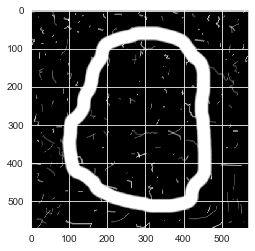

In [12]:
img_path = os.path.join(img_base_path,"Fig1105(a)(noisy_stroke).tif")
img = Image.open(img_path)
img = np.asarray(img)

print(img.shape)

plt.imshow(img,cmap="gray")

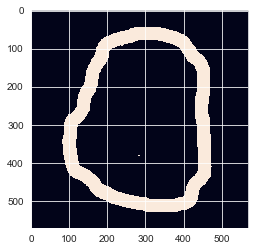

In [13]:
tmp_img = cv2.blur(img,(9,9))
th,tmp_img = cv2.threshold(tmp_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(tmp_img)
plt.show()

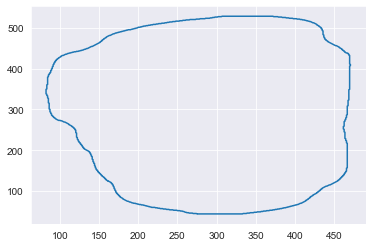

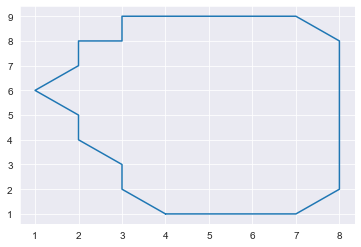

In [14]:
black_img = np.zeros_like(img)

# plt.imshow(cv2.findContours(black_img,contours,1,[255,255,255],2))

tmp_img = cv2.blur(img, (9, 9))
th, tmp_img = cv2.threshold(
    tmp_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
image, contours, hierarchy = cv2.findContours(
    tmp_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contour = contours[-1]
contour = np.reshape(contour, (contour.shape[0], contour.shape[-1]))
x = [i[0] for i in contour]
y = [i[1] for i in contour]
plt.plot(x, y)
plt.show()

r = freeman_code.get_freeman_coordination(tmp_img, contour)

x = [i[0] for i in r]
y = [i[1] for i in r]

plt.plot(x,y)


# plt.imshow(cv2.drawContours(black_img,contours,1,[22,255,255],2))

## 标记图

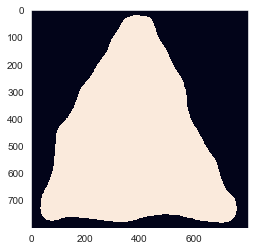

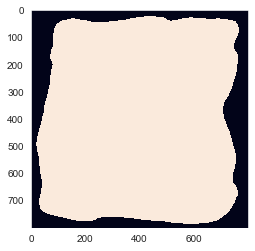

In [10]:
sns.set_style("dark")

img1_path = os.path.join(img_base_path,"Fig1111(a)(triangle).tif")
img1 = Image.open(img1_path)
img1 = np.asarray(img1)
img1 = img1.astype(np.uint8)

img2_path = os.path.join(img_base_path,r"Fig1111(b)(square).tif")
img2 = Image.open(img2_path)
img2 = np.asarray(img2)
img2 = img2.astype(np.uint8)

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

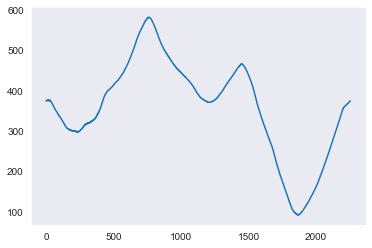

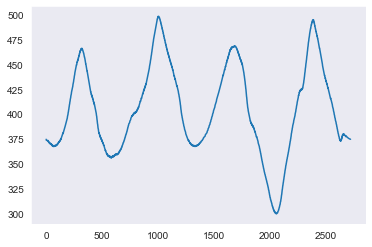

In [11]:
import mark_sheet

distances = mark_sheet.get_mark_sheet(img1)
plt.plot(distances)
plt.show()

distances = mark_sheet.get_mark_sheet(img2)
plt.plot(distances)
plt.show()

## 骨架

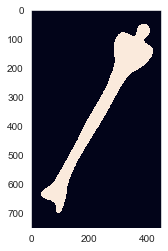

In [18]:
img = Image.open(os.path.join(img_base_path,r"Fig1116(leg_bone).tif"))
img = np.asarray(img)
sns.set_style("dark")

plt.imshow(img)

In [21]:
import mat

skeleton_img = mat.get_img_skeleton_by_mat(img)

正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行MAT算法的第11轮
正在执行MAT算法的第12轮
正在执行MAT算法的第13轮
正在执行MAT算法的第14轮
正在执行MAT算法的第15轮
正在执行MAT算法的第16轮
正在执行MAT算法的第17轮
正在执行MAT算法的第18轮
正在执行MAT算法的第19轮
正在执行MAT算法的第20轮
正在执行MAT算法的第21轮
正在执行MAT算法的第22轮
正在执行MAT算法的第23轮
正在执行MAT算法的第24轮
正在执行MAT算法的第25轮
正在执行MAT算法的第26轮
正在执行MAT算法的第27轮
正在执行MAT算法的第28轮
正在执行MAT算法的第29轮
正在执行MAT算法的第30轮
正在执行MAT算法的第31轮
正在执行MAT算法的第32轮
正在执行MAT算法的第33轮
正在执行MAT算法的第34轮
正在执行MAT算法的第35轮
正在执行MAT算法的第36轮
正在执行MAT算法的第37轮
正在执行MAT算法的第38轮
正在执行MAT算法的第39轮
正在执行MAT算法的第40轮
正在执行MAT算法的第41轮
正在执行MAT算法的第42轮
正在执行MAT算法的第43轮
正在执行MAT算法的第44轮
正在执行MAT算法的第45轮
正在执行MAT算法的第46轮
正在执行MAT算法的第47轮
正在执行MAT算法的第48轮
正在执行MAT算法的第49轮
正在执行MAT算法的第50轮
正在执行MAT算法的第51轮
正在执行MAT算法的第52轮
正在执行MAT算法的第53轮
正在执行MAT算法的第54轮
正在执行MAT算法的第55轮
正在执行MAT算法的第56轮
正在执行MAT算法的第57轮
正在执行MAT算法的第58轮


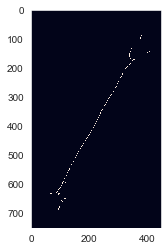

In [22]:
plt.imshow(skeleton_img)

## 形状数

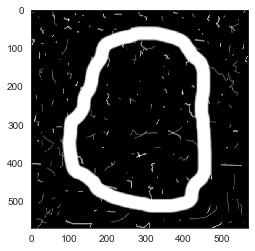

In [10]:
sns.set_style("white")

img_path = os.path.join(img_base_path,"Fig1105(a)(noisy_stroke).tif")
img = Image.open(img_path)
img = np.asarray(img)

plt.imshow(img,cmap = "gray")

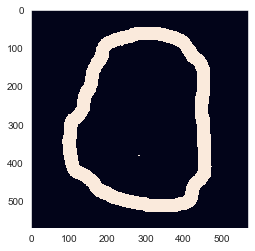

In [32]:
sns.set_style("dark")

# tmp_img = cv2.GaussianBlur(img,(9,9),0)
tmp_img = cv2.blur(img,(9,9))
_,tmp_img = cv2.threshold(tmp_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(tmp_img)

# freeman_code.get_freeman_code(img)

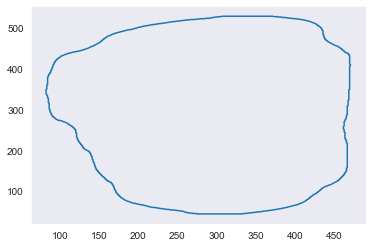

In [33]:
image, contours, hierarchy = cv2.findContours(
    tmp_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contour = contours[-1]
contour = np.reshape(contour, (contour.shape[0], contour.shape[-1]))
x = [i[0] for i in contour]
y = [i[1] for i in contour]

plt.plot(x,y)

In [37]:
print("形状数为：")
print(shape_number.get_shape_number(img,contour))

形状数为：
[0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 7, 7, 0, 0, 7, 1, 7, 1, 6, 1, 6, 2, 6]


## 纹理

### 灰度共生矩阵

In [2]:
img1_path = os.path.join(img_base_path,r"Fig1130(a)(uniform_noise).tif")
img2_path = os.path.join(img_base_path,r"Fig1130(b)(sinusoidal).tif")
img3_path = os.path.join(img_base_path,r"Fig1130(c)(cktboard_section).tif")

img_path_list = [img1_path,img2_path,img3_path]

img_list = list()
for tmp_path in img_path_list:
    img = Image.open(tmp_path)
    img = np.asarray(img)
    img_list.append(img)

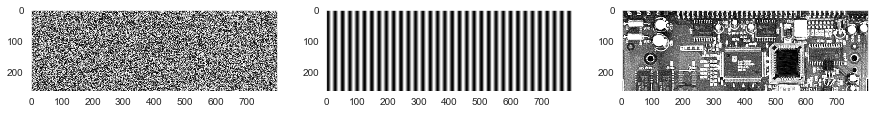

In [16]:
sns.set_style("dark")
plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,3,1)
ax1.imshow(img_list[0],cmap = "gray")

ax2 = plt.subplot(1,3,2)
ax2.imshow(img_list[1],cmap = "gray")

ax3 = plt.subplot(1,3,3)
# 由于各个位置上的个数相差太大，直接显示图像是一张黑图，这里加入log函数以减少差距
ax3.imshow(img_list[2],cmap = "gray")

In [7]:
from  src.chapter11 import texture
reload(texture)

co_matrix1 = texture.get_co_occurrence_matrix(img_list[0],gray_rank=128)
co_matrix2 = texture.get_co_occurrence_matrix(img_list[1],gray_rank=128)
co_matrix3 = texture.get_co_occurrence_matrix(img_list[2],gray_rank=128)

F:\Miya\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


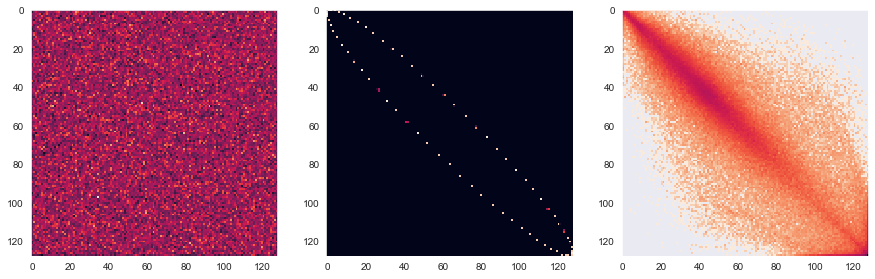

In [39]:
sns.set_style("dark")
plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,3,1)
ax1.imshow(co_matrix1)

ax2 = plt.subplot(1,3,2)
ax2.imshow(co_matrix2)

ax3 = plt.subplot(1,3,3)
# 由于各个位置上的个数相差太大，直接显示图像是一张黑图，这里加入log函数以减少差距
ax3.imshow(1 - np.log(co_matrix3))

### 共生矩阵描述子

In [9]:
from  src.chapter11 import texture
reload(texture)

descriptor_method_dict = {
    "最大概率": texture.get_max_probability,
    "相关性": texture.get_correlation,
    "对比度": texture.get_contrast,
    "一致性": texture.get_consistency,
    "同质性": texture.get_homogeneity,
    "熵": texture.get_entropy
}

co_matrix_list = [co_matrix1,co_matrix2,co_matrix3]
descriptor_dict = dict()


for i,co_matrix in enumerate(co_matrix_list):
    for method_name,method in descriptor_method_dict.items():
        descriptor_dict.setdefault(method_name,dict())
        descriptor_dict[method_name]["图片{}".format(i)] = method(co_matrix)
        
pd.DataFrame(descriptor_dict)

F:\zq\PyCharmProject\ImgPractice\src\chapter11\texture.py:248: RuntimeWarning: divide by zero encountered in log2
  tmp_log_matrix = np.log2(prob_matrix)


,最大概率,相关性,对比度,一致性,同质性,熵
图片0,0.000148,-3.691181e-07,2709.773448,0.000066,0.062489,13.941672
图片1,0.015019,4.741120e-04,142.684606,0.013379,0.135470,6.268985
图片2,0.066333,6.644079e-04,260.953007,0.004722,0.277187,11.879802


### n跳共生矩阵组成的序列图像

In [7]:
from  src.chapter11 import texture
reload(texture)

final_step = 50
"""遍历图像"""
correlation_list = list()
for i,img in enumerate(img_list):
    tmp_correlation_list = texture.get_co_occurrence_correlation_seq(img)
    correlation_list.append(tmp_correlation_list)

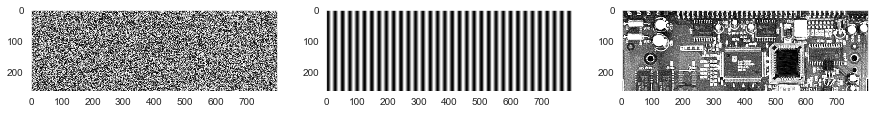

In [15]:
sns.set_style("dark")
plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,3,1)
ax1.imshow(img_list[0],cmap = "gray")

ax2 = plt.subplot(1,3,2)
ax2.imshow(img_list[1],cmap = "gray")

ax3 = plt.subplot(1,3,3)
# 由于各个位置上的个数相差太大，直接显示图像是一张黑图，这里加入log函数以减少差距
ax3.imshow(img_list[2],cmap = "gray")

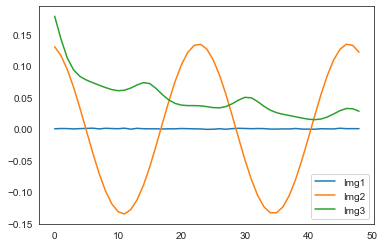

In [12]:
sns.set_style("white")

correlation_df = pd.DataFrame(correlation_list).T
correlation_df.columns = ["Img1","Img2","Img3"]
correlation_df.plot()

## 不变矩

## 主成分

3


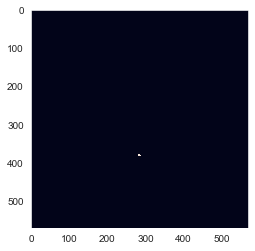

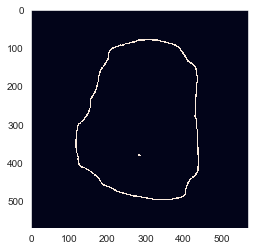

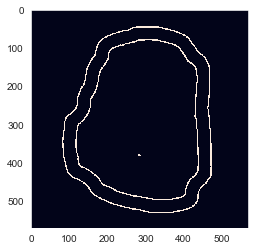

In [4]:
image,contours, hierarchy = cv2.findContours(tmp_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow()
print(len(contours))
black_img = np.zeros_like(img)

for i in range(len(contours)):
    plt.imshow(cv2.drawContours(black_img,contours,i,[22,255,255],2))
    plt.show()

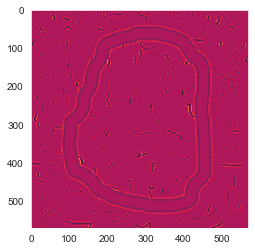

In [20]:
t_img = cv2.blur(img,(5,5))
t_img = cv2.Laplacian(t_img,3)
plt.imshow(t_img,)